# A Study of the sleeping situation of PSU students in November by conducting a Two-factor ANCOVA Experiment

## Abstract

The motivation of this report is to observe the sleeping situation of PSU students in November and study the relations between the average sleeping hours of students and their class standing, majors and the number of dues they have every week, which is considered the covariate in the experiment. The experimental units are PSU students including freshmen, sophomore, junior and senior majoring in Engineering, Business and Liberal Arts. And the data model applied to the experiment is the Two Factor ANCOVA model.


## Introduction

As the workload and stress level of students gets higher when the final month approaches, their sleeping condition is affected as well. And the effect differs for students in different class standing and majors. For example, compared with freshmen, seniors are more likely to take on a heavier workload and have more responsibilities such as academic research or job searching. And the major students are in play an important role as well. Engineering students usually have more academic obligations such as experiments, labs, group projects, technical papers that they need  to work on. So are the students in smeal college of business studying finance, accounting and marketing where case studies require lots of work. In comparison, Liberal Arts students might have a more flexible class schedule and not be as busy as their peers in Engineering and Business.

## Data Set

The dataset for the experiment is collected in November 2018 from 12 full-time students studying in PSU. Among them there are 3 majoring in Engineering, Business and Liberal Arts respectively in each class standing (freshmen, sophomore, junior, senior). Each week, their average sleeping hours and the total number of dues in that specific week is collected (during which since there's a Thanksgiving break, so the absent week is replaced by the week everyone is back to school 11/26/2018 - 12/02/2018).

The attributes contained in the dataset include:

- __class standing__
- __major__
- __Number of dues per week__
- __Average sleeping hours per week__

In [2]:
class=c(rep("freshmen", 12), 
        rep("sophomore", 12),
        rep("junior", 12),
        rep("senior", 12))
major=c(rep(c(rep("Engineering", 4), 
              rep("Business", 4),
              rep('Liberal Arts', 4)),
            4))
num_of_dues_per_week = c(5, 4, 6, 7,
                         4, 3, 3, 5,
                         2, 3, 4, 4,
                         6, 5, 8, 7,
                         6, 3, 4, 6,
                         4, 3, 3, 4,
                         4, 6, 4, 5,
                         5, 4, 6, 4,
                         4, 5, 5, 4,
                         6, 5, 5, 7,
                         6, 4, 5, 6,
                         4, 2, 3, 3)
avg_sleep_hrs_per_week=c(7.1, 7.5, 7.2, 6.9, 
                         7.1, 7.6, 7.4, 7.1,
                         8.5, 8.3, 8.0, 8.1,
                         7.0, 7.4, 6.4, 6.7,
                         7.3, 8.0, 6.4, 7.5,
                         8.0, 8.3, 8.2, 7.9,
                         6.5, 6.6, 7.0, 7.2,
                         7.5, 7.7, 7.8, 7.8,
                         7.1, 7.7, 7.8, 7.6,
                         6.4, 6.9, 5.9, 6.1,
                         6.5, 7.3, 6.8, 6.4,
                         7.4, 8.0, 7.3, 7.8)
df=data.frame(class, major, num_of_dues_per_week, avg_sleep_hrs_per_week)

In [3]:
library(Hmisc)
latex(df, out='e.tex')

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



## Exploratory data analysis

### Basic plots

#### average sleeping hrs

#### 1

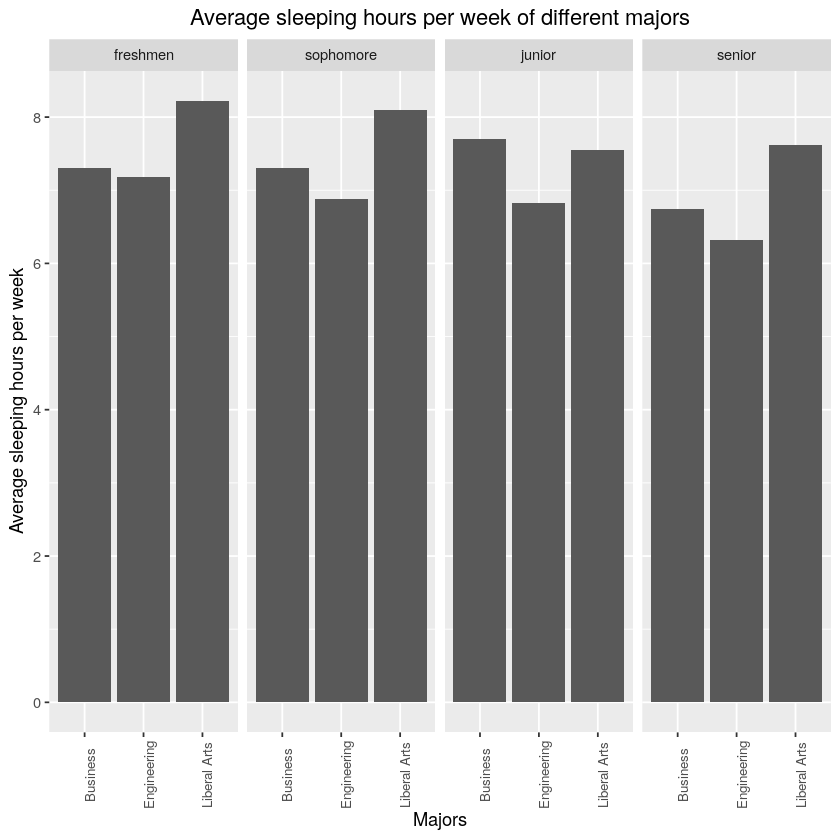

In [38]:
library(ggplot2)
library(plyr)

df_sleep <- ddply(df, .(class), transform, pos = cumsum(avg_sleep_hrs_per_week) - (0.5 * avg_sleep_hrs_per_week)) 
df_sleep$class_adjusted = factor(df_sleep$class, levels=c('freshmen','sophomore','junior','senior'))
# Plotting
ggplot(df_sleep, aes(x = major, y = avg_sleep_hrs_per_week*0.25)) + 
  geom_bar(stat="identity") + 
  facet_grid(.~class_adjusted) +
  ylab('Average sleeping hours per week') + 
  xlab('Majors') +
  ggtitle('Average sleeping hours per week of different majors') +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90, size = 8))

#### 2

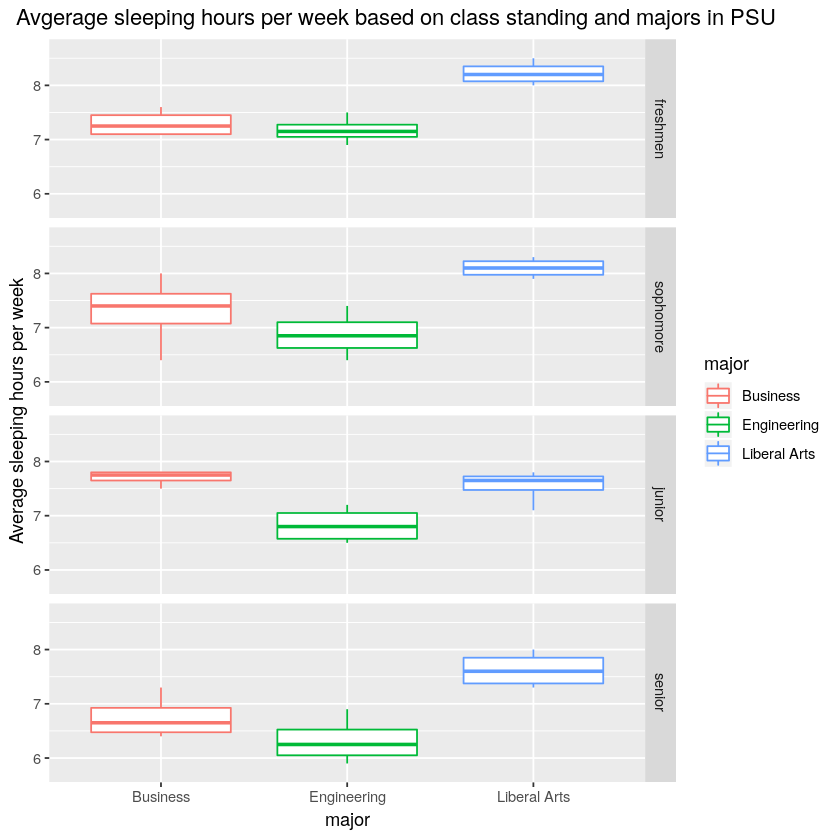

In [10]:
ggplot(df_sleep, aes(x=major, y=avg_sleep_hrs_per_week, color=major)) +
        geom_boxplot() +
        facet_grid(vars(class_adjusted)) +
        ylab('Average sleeping hours per week') +
        ggtitle('Avgerage sleeping hours per week based on class standing and majors in PSU') +
        theme(plot.title = element_text(hjust = 0.2)) +
        ylim(min(df$avg_sleep_hrs_per_week)-0.2, max(df$avg_sleep_hrs_per_week)+0.2)

#### Number of dues per week

#### 1

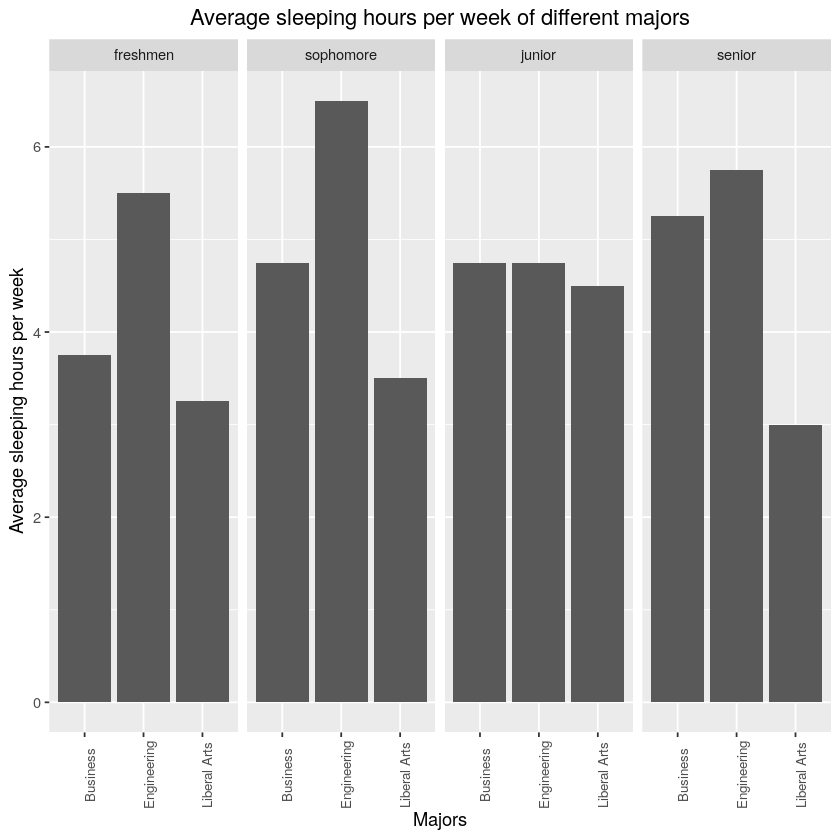

In [39]:
df_due <- ddply(df, .(class), transform, pos = cumsum(num_of_dues_per_week) - (0.5 * num_of_dues_per_week)) 
df_due$class_adjusted = factor(df_due$class, levels=c('freshmen','sophomore','junior','senior'))
# Plotting
ggplot(df_due, aes(x = major, y = num_of_dues_per_week*0.25)) + 
  geom_bar(stat="identity") + 
  facet_grid(.~class_adjusted) +
  ylab('Average sleeping hours per week') + 
  xlab('Majors') +
  ggtitle('Number of dues per week of different majors') +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90, size = 8))

#### 2

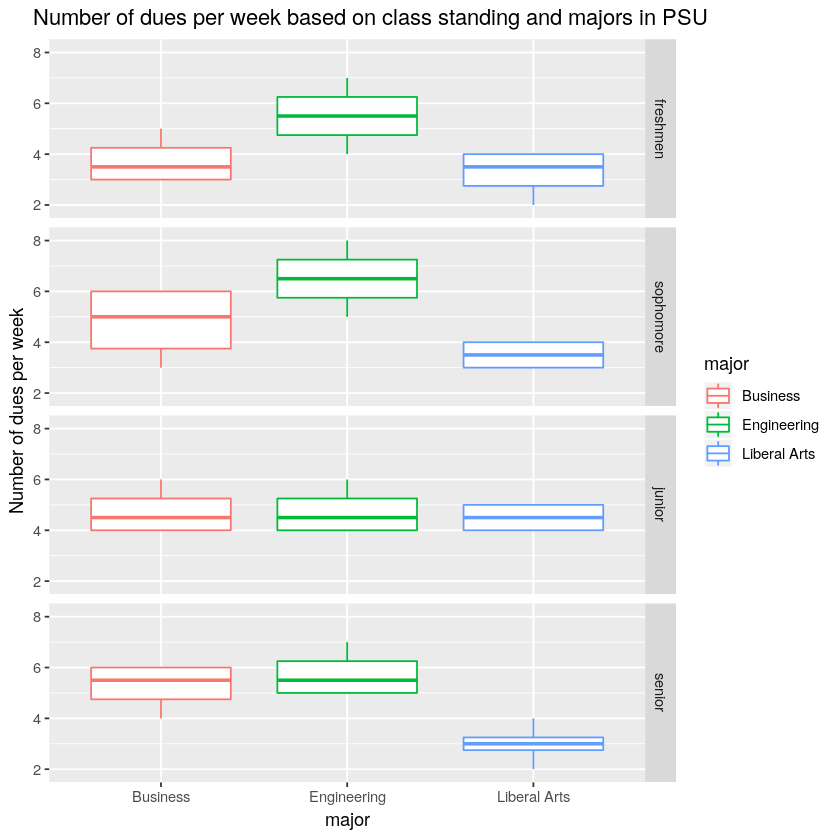

In [13]:
ggplot(df_due, aes(x=major, y=num_of_dues_per_week, color=major)) +
        geom_boxplot() +
        facet_grid(vars(class_adjusted)) +
        ylab('Number of dues per week') +
        ggtitle('Number of dues per week based on class standing and majors in PSU') +
        theme(plot.title = element_text(hjust = 0.2)) +
        ylim(min(df$num_of_dues_per_week)-0.2, max(df$num_of_dues_per_week)+0.2)

## Modeling

### Description

The Two-factor covariance data model for this experiment is:

$$Y_{ijt} = \mu + \alpha_{i} + \beta_{j} + (\alpha \beta)_{ij} + \gamma (X_{ijt} -\bar X_{...}) + \epsilon_{ijt}, \: \epsilon_{ijt}
\stackrel{iid}{\sim} N(0, \sigma^2)$$

where 

$$\alpha:\text{The fixed effect of the variable class Standing (Freshmen, Sophomore, Junior, Senior) } $$
$$\beta: \text{ Major: Engineering, Business, Liberal Arts } $$
$$X: \text{ The number of dues per week }$$
$$Y: \text{ The average sleeping hours per week }$$
$$i = 1, 2, 3, 4$$
$$j = 1, 2, 3$$
$$t = 1, 2, 3, 4$$

Analysis before building the Two-Factor ANCOVA model:

#### Whether there are interactions between treatment and covariate?

In [41]:
mod1 <- aov(avg_sleep_hrs_per_week ~ I(num_of_dues_per_week-mean(num_of_dues_per_week)) + class, data = df)
mod2 <- aov(avg_sleep_hrs_per_week ~ I(num_of_dues_per_week-mean(num_of_dues_per_week))*class, data = df)
latex(anova(mod1, mod2))

In [42]:
mod1 <- aov(avg_sleep_hrs_per_week ~ I(num_of_dues_per_week-mean(num_of_dues_per_week)) + major, data = df)
mod2 <- aov(avg_sleep_hrs_per_week ~ I(num_of_dues_per_week-mean(num_of_dues_per_week))*major, data = df)
latex(anova(mod1, mod2))

We can observe from there ANOVA contrast table that after adding the interaction term __I(num_of_dues_per_week-mean(num_of_dues_per_week))*class__ and __I(num_of_dues_per_week-mean(num_of_dues_per_week))*major__ to the ANOVA model, the new $p$ value becomes $0.1715765$ which is $>0.05$ and  0.961679, which is also $>0.05$, indicating the additional interaction term between __num_of_dues_per_week__ and __class standing__ is not significant, and  the additional interaction term between __num_of_dues_per_week__ and __major__ is not significant either.

#### Diagnostics: linearity and equal slopes assumptions valid?

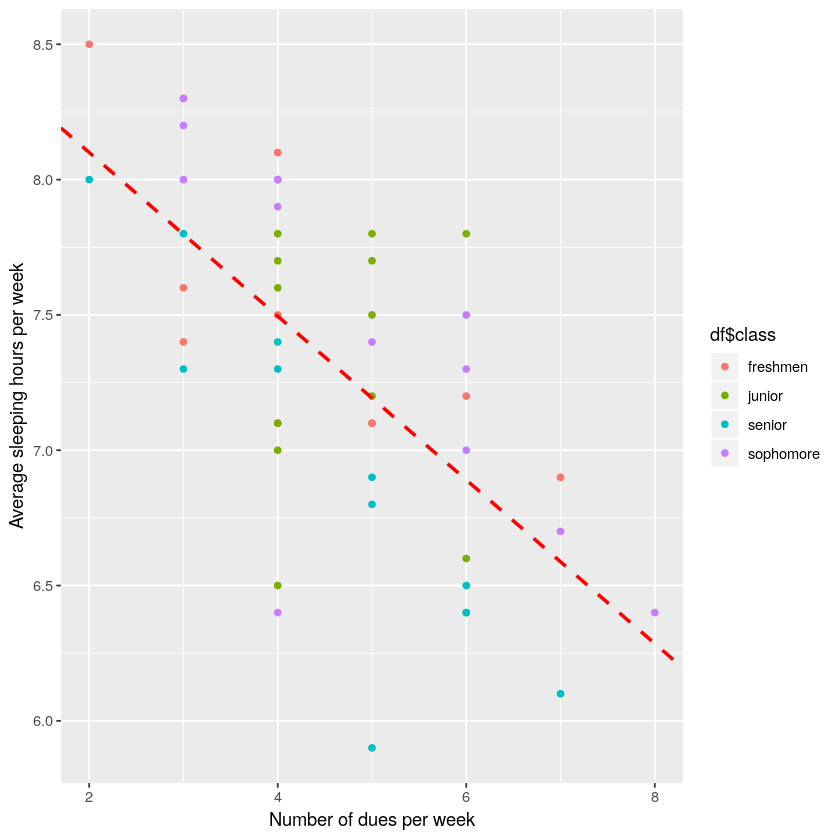

In [16]:
qplot(x = df$num_of_dues_per_week, 
      y = df$avg_sleep_hrs_per_week, 
      col = df$class,
      xlab = 'Number of dues per week',
      ylab = 'Average sleeping hours per week') + 
geom_abline(intercept = 8.7053, 
            slope = -0.3025, 
            color="red", 
            linetype="dashed", 
            size=1)

Discussion: 
It appears that both the linearity and equal slopes assumptions required for
ANCOVA are valid. 

### ANCOVA Tests

In [17]:
library(knitr)
library(lsmeans)
library(multcomp)

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



### Test 1

#### Null Hypothesis:

$$H_0 : (\alpha \beta)_{ij} = 0 \text{ for all } i, j$$

#### Alternative Hypothesis:

$$H_a : (\alpha \beta)_{ij} \neq 0 \text{ for all } i, j$$



The first test is for significant interaction terms:

In [58]:
library(knitr)
library(xtable)
aov.sleep=aov(avg_sleep_hrs_per_week~class+major+class:major+I(num_of_dues_per_week-mean(num_of_dues_per_week)), data = df)
anova(aov.sleep)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
class,3,2.994167,0.9980556,9.818221,7.685012e-05
major,2,9.305000,4.6525000,45.768266,1.707702e-10
I(num_of_dues_per_week - mean(num_of_dues_per_week)),1,1.131582,1.1315821,11.131768,2.019774e-03
class:major,6,1.563882,0.2606470,2.564076,3.648690e-02
Residuals,35,3.557869,0.1016534,NA,NA


#### Check whether residuals violate any principles

##### Original

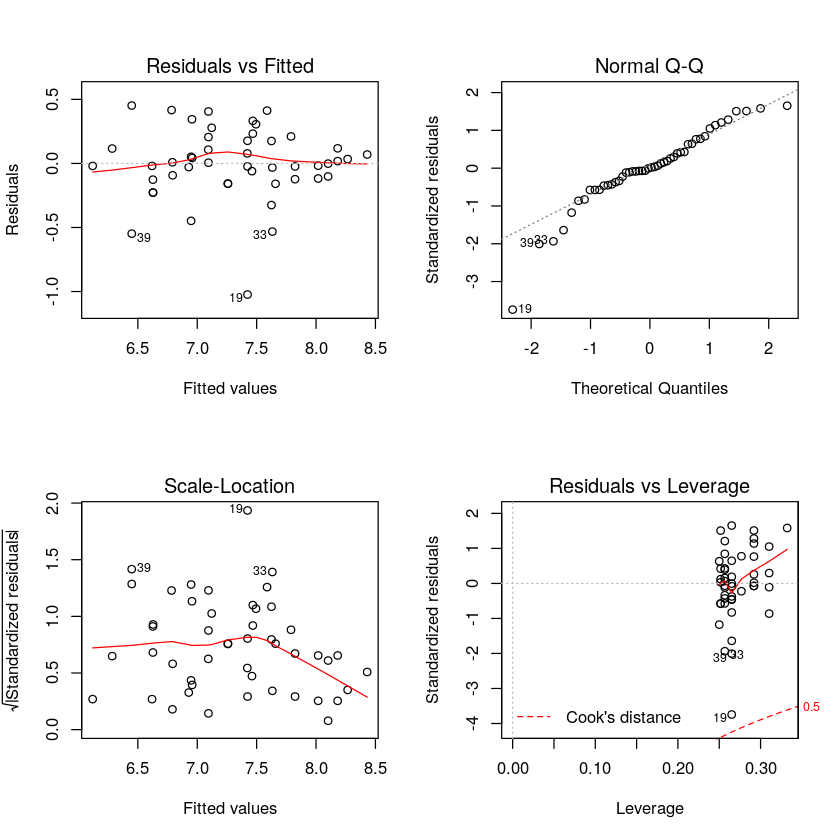

In [19]:
    par(mfrow=c(2,2))
    plot(aov.sleep)

From the diagnostic plots above we can see that the assumptions of  normality and the constancy of variance of residuals are not violated. Therefore no transformation of variables is needed for this experiment.

Discussion: From the ANCOVA table, we can see that the P value of __class:major__ is 0.0364869, and since $0.0364869 < 0.05$, therefore under the significance level of $5\%$, we are confident enough to reject the null hypothesis and conclude that the interaction term is significant.

Confirm the significant interaction with interaction plot:

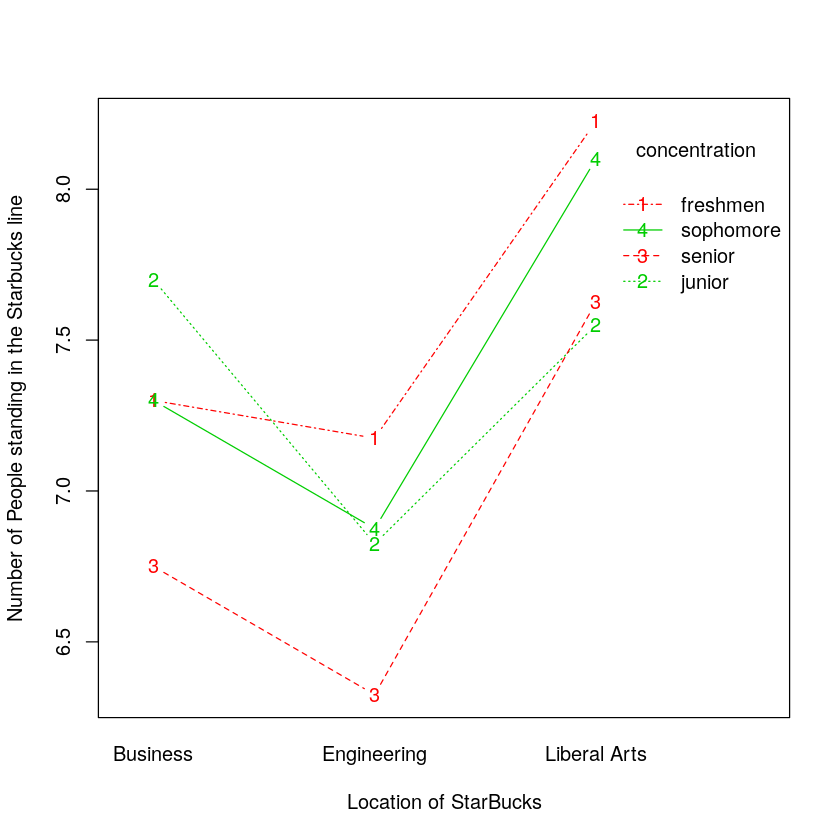

In [20]:
interaction.plot(x.factor = df$major, trace.factor = df$class,
                response = df$avg_sleep_hrs_per_week, type ="b",col = 2:3,
                xlab ="Location of StarBucks", 
                ylab ="Number of People standing in the Starbucks line",
                trace.label ="concentration")

Discussion:

The interaction plot shows a strong interaction, with the lines for concentration=Freshmen, concentration=Sophomore, concentration=Junior, concentration=Senior not being parallel with each other. 

### Test 2

Since there are significant interactions, then we can't interpret the effects of each factor individually, and we move directly to testing for pairwise differences between all combinations between class standing and majors

#### Null Hypothesis:

$$H_0 : \tau_{ij} - \tau_{kl} = 0, \text{ for all } i, j, k, j, \text{ where } (i,j) \neq (k,l)$$

#### Alternative Hypothesis:

$$H_a :  \tau_{ij} - \tau_{kj} \neq 0$$




In [22]:
lsminter=lsmeans(aov.sleep, ~ class:major)
contrast(lsminter,method="pairwise")
xtable(contrast(lsminter,method="pairwise"), type = "latex", file = "filename.tex")

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Tue Dec  4 20:13:26 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrl}
  \hline
contrast & estimate & SE & df & t.ratio & p.value \\ 
  \hline
freshmen,Business - junior,Business & -0.5644 & 0.2314 & 35 & -2.439 & 0.4084 \\ 
  freshmen,Business - senior,Business & 0.3034 & 0.2387 & 35 & 1.271 & 0.9777 \\ 
  freshmen,Business - sophomore,Business & -0.1644 & 0.2314 & 35 & -0.711 & 0.9999 \\ 
  freshmen,Business - freshmen,Engineering & -0.1628 & 0.2433 & 35 & -0.669 & 0.9999 \\ 
  freshmen,Business - junior,Engineering & 0.3106 & 0.2314 & 35 & 1.342 & 0.9670 \\ 
  freshmen,Business - senior,Engineering & 0.6461 & 0.2485 & 35 & 2.600 & 0.3174 \\ 
  freshmen,Business - sophomore,Engineering & -0.0272 & 0.2673 & 35 & -0.102 & 1.0000 \\ 
  freshmen,Business - freshmen,Liberal Arts & -0.8428 & 0.2270 & 35 & -3.713 & 0.0294 \\ 
  freshmen,Business - junior,Liberal Arts & -0.3733 & 0.2288 & 35 & -1.631 & 0.8855 \\ 
  freshmen,

From the p values of contrast table of interaction terms, we could make the following conclusions:

- Freshmen majoring in Business sleep significantly less than freshmen majoring in Liberal Arts;
- Junior majoring in Business sleep significantly more than senior majoring in Business;
- Junior majoring in Business sleep significantly more than junior majoring in Engineering;
- Junior majoring in Business sleep significantly more than senior majoring in Engineering;
- Senior majoring in Business sleep significantly less than freshmen majoring in Liberal Arts;
- Senior majoring in Business sleep significantly less than sophomore majoring in Liberal Arts;
- Sophomore majoring in Business sleeps significantly more than senior majoring in Engineering;
- Freshmen majoring in Engineering sleeps significantly more than senior majoring in Engineering;
- Junior,Engineering sleeps significantly less than freshmen majoring in Liberal Arts;
- Senior Engineering sleeps significantly less than freshmen majoring in Liberal Arts;
- Senior Engineering sleeps significantly less than junior majoring in Liberal Arts;
- Senior Engineering sleeps significantly less than sophomore majoring in Liberal Arts;
- No other comparisons are significantly different than zero.

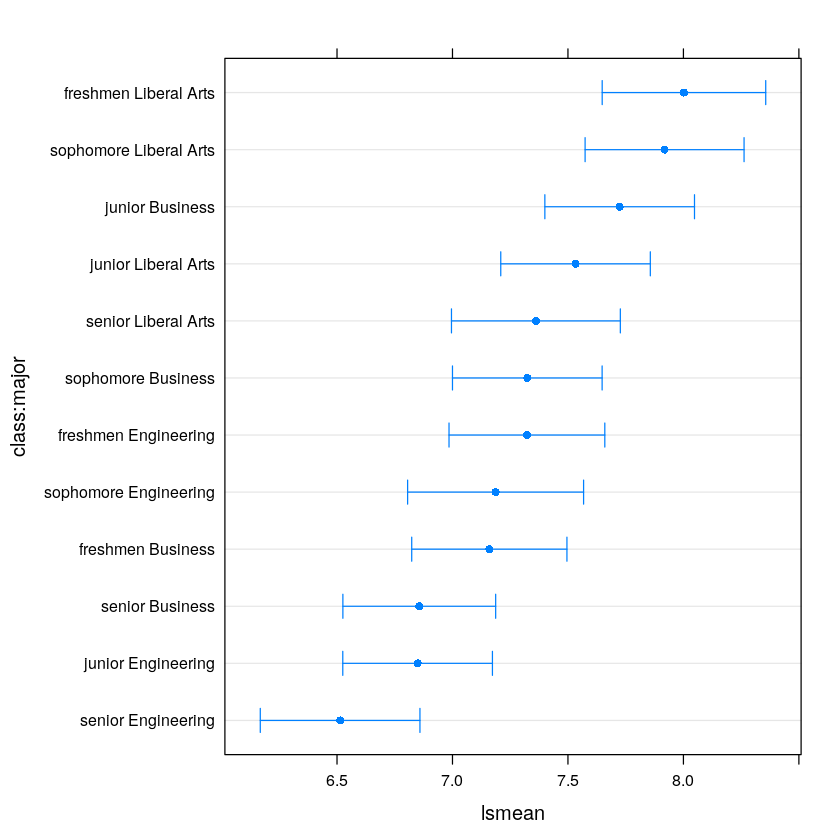

In [60]:
contrast_inter = cld(lsminter, alpha=0.05)
plot(contrast_inter)

## Conclusion

From the Two-Factor ANCOVA experiment conducted above to study the sleeping condition of PSU students of different class standing and different majors in November (the month before the finals) we learn that the linearity and equal slope assumption between the covariate and the response is valid and there exists an interaction effect between class standing and major. Specifically from the contrast table of the interactive combination of class standing and major , juniors and seniors who are majoring in Engineering sleep significantly less than freshmen and sophomore majoring in Liberal Arts, which confirms the speculation made in the introduction that Engineering students are more likely to shoulder more workload and that affects their sleeping conditions. 